<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_09_MatricesAutovaloresAutovectores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch as pt
import sympy as sp
import matplotlib.pyplot as plt

# Autovalores, autovectores, diagonalización

Una matriz es diagonalizable cuando es semejante a una matriz diagonal. Esto significa que mediante un cambio de base, podemos reducir la matriz original a una forma diagonal. Para que una matriz sea diagonalizable, debe cumplir las siguientes condiciones:

**Autovectores linealmente independientes**: Una matriz $(A \in \mathbb{R}^{n \times n})$ es diagonalizable si y solo si tiene (n) autovectores linealmente independientes. Esto significa que los autovectores asociados a los autovalores deben ser linealmente independientes.

**Semejanza**: Existe una matriz invertible (P) tal que ($P^{-1}AP = D$), donde (D) es una matriz diagonal formada por los autovalores de (A).

La diagonalización es un proceso que transforma una matriz cuadrada ( A ) en una matriz diagonal ( D ) mediante una matriz invertible ( P ), tal que:

$P^{-1}AP = D$

La matriz diagonal ( D ) contiene los autovalores de ( A ) en la diagonal principal, y las columnas de ( P ) son los autovectores correspondientes a esos autovalores.

## Numpy

In [ ]:
# Definir una matriz 3x3
A = np.array([[4, 2, 0],
              [2, 4, 1],
              [0, 1, 3]])

# Calcular autovalores y autovectores
autovalores, autovectores = np.linalg.eig(A)
U = autovectores.copy()
print("Autovalores:", autovalores)
print("Autovectores:\n", autovectores)


Autovalores: [6.16424794 1.60861762 3.22713444]
Autovectores:
 [[-0.6611152   0.56181831 -0.49727948]
 [-0.7154086  -0.6717612   0.19216509]
 [-0.2260912   0.48280128  0.84604119]]


### Matriz Diagonal

In [ ]:
D = np.linalg.inv(U)@A@U
np.set_printoptions(suppress=True, precision=6)
D

array([[ 6.164248,  0.      , -0.      ],
       [-0.      ,  1.608618, -0.      ],
       [ 0.      , -0.      ,  3.227134]])

## Actividad:

Construir un programa que permita elevar una matriz a una potencia.


La exponencial de una matriz ( $e^A$) se define como la serie de Taylor de la función exponencial evaluada en la matriz ( A ):


\begin{equation}
e^A = I + A + \frac{1}{2!}A^2 + \frac{1}{3!}A^3 + \cdots = \sum_{n=0}^{\infty} \frac{1}{n!}A^n
\end{equation}


Donde ( $e^D$ ) es simplemente la matriz exponencial de la matriz diagonal ( D ), que es fácil de calcular porque solo implica elevar los autovalores de (A) a la potencia de (e):



\begin{equation}
e^A = Pe^DP^{-1}
\end{equation}


Exponencial de una matriz diagonal

\begin{equation}
e^D = \begin{bmatrix}
e^{\lambda_1} & 0 & \cdots & 0 \\
0 & e^{\lambda_2} & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & e^{\lambda_n}
\end{bmatrix}
\end{equation}




In [ ]:
def Diagonaliable(P,D):
  A_ = P @ D @ np.linalg.inv(P) # Teorema de diagonalizacion A = PDP^-1 con P=[v1,...,vn] donde v1,...,vn son los vectores propios
  if np.allclose(A, A_):
    print("La Matrix es diagonalizable")
    return True
  else:
    print("No es diagonalizable")
    return False

In [ ]:
def Matrix_Potencia(A):
  np.set_printoptions(suppress=True, precision=6)
  autovalores, autovectores = np.linalg.eig(A)
  autovalores_ = np.matrix(autovalores)
  D = np.diag(autovalores)
  P = autovectores.copy()
  valor_bool = Diagonaliable(P,D)
  if valor_bool == True:
    lista_valores = ([])
    for i in autovalores:
      e_elevado = np.exp(i) # e^autovalor
      lista_valores = np.append(lista_valores,e_elevado)
    E = np.diag(lista_valores) # e^D
    matrix_elevada = P @ E @ np.linalg.inv(P) # Definicion de e^A
    return print("e^A =", matrix_elevada)

In [ ]:
A = np.array([[4, 2, 0],
              [2, 4, 1],
              [0, 1, 3]])

In [ ]:
Matrix_Potencia(A)

La Matrix es diagonalizable
e^A = [[215.613982 220.575     61.815562]
 [220.575    246.521763  79.379719]
 [ 61.815562  79.379719  43.51092 ]]


Esta matrix no es diagonalizable

In [ ]:
A = np.array([[-4, -1, 1],
              [0, -5, 1],
              [-1, 0, -3]])

# Autovalores y autovectores complejos

In [ ]:
theta=-np.pi/4
A = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta), np.cos(theta)]])

# Calcular autovalores y autovectores
autovalores, autovectores = np.linalg.eig(A)
U = autovectores.copy()
print("Autovalores:", autovalores)
print("Autovectores:\n", autovectores)

D = np.linalg.inv(U)@A@U
np.set_printoptions(suppress=True, precision=6)
D

Autovalores: [0.707107+0.707107j 0.707107-0.707107j]
Autovectores:
 [[0.707107+0.j       0.707107-0.j      ]
 [0.      +0.707107j 0.      -0.707107j]]


array([[0.707107+0.707107j, 0.      +0.j      ],
       [0.      +0.j      , 0.707107-0.707107j]])

Actividad 2.

Considere la ecuación cuadrática $x^2-4xy+3y^2=6$, esta ecuación cuadrática se corresponde a una hiperbola, la cual puede ser escrita en forma matricial como sigue:

$A\vec{v} \cdot \vec{v}=6$, donde $\vec{v}=(x, y)$ y A es una matrix simetrica,

\begin{equation}
A=\begin{bmatrix}
1 & -2 \\
-2 & 3 \\
\end{bmatrix}
\end{equation}

1. Realice un grafico que represente la hyperbola







- Diagonalice A, para ello construya la matrix Q de autovectores ortoganales
tal que $D=Q^{T}AQ$, en este caso se dice que A es diagonalizable ortogonalmente, donde $A=QDQ^T$.

- Aplique el resultado de la siguiente demostración para encontrar una nueva hyperbola en una  nueva base

\begin{equation}
QDQ^T \vec{v} \cdot \vec{v} = d
\end{equation}


\begin{equation}
Q(DQ^T\vec{v}) \cdot \vec{v} = (DQ^T\vec{v}) \cdot (Q^T\vec{v})=d
\end{equation}


\begin{equation}
(DQ^T\vec{v}) \cdot (Q^T\vec{v})=d
\end{equation}


Sea $u=Q^T\vec{v}$

Luego :


\begin{equation}
(D\vec{u}) \cdot \vec{u}=d
\end{equation}

donde $\vec{u}=(x', y')$, tal que $D\vec{u} \cdot \vec{u}=d$ es una nueva hyperbola









**PUNTO 1)** Diagonalizar A: Se comprueba que A es diagonalizable ortogonalmente

In [ ]:
np.set_printoptions(suppress=True, precision=6)

In [ ]:
A = np.array([[1, -2],
              [-2, 3]])

In [ ]:
u = sp.symbols("x")
v = sp.symbols("y")
v_ = np.array([u,v])

$A\vec{v} \cdot \vec{v}=6$, donde $\vec{v}=(x, y)$ y A es una matrix simetrica. Esto es  igual a : $x^2-4xy+3y^2=6$

In [ ]:
ecuacion_ = A @ v_
ecuacion_hiperbola_ = np.dot(ecuacion_,v_)
ecuacion = sp.Eq(ecuacion_hiperbola_, 6)
expresion_simplificada = sp.simplify(ecuacion)
expresion_simplificada

Eq(x**2 - 4*x*y + 3*y**2, 6)

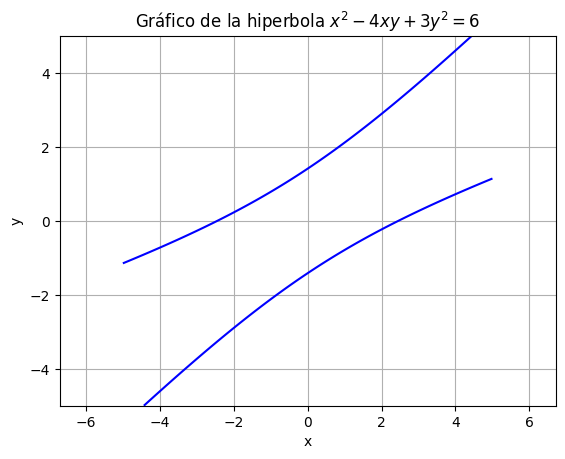

In [ ]:
# Definición de la ecuación de la hiperbola
def hiperbola(x, y):
    return x**2 - 4*x*y + 3*y**2 - 6

# Generación de puntos que satisfacen la ecuación de la hiperbola
x = np.linspace(-5, 5, 400)
y = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x, y)
Z = hiperbola(X, Y)

# Graficar la hiperbola
plt.contour(X, Y, Z, levels=[0], colors='b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfico de la hiperbola $x^2 - 4xy + 3y^2 = 6$')
plt.grid(True)
plt.axis('equal')
plt.show()

\begin{equation}
QDQ^T \vec{v} \cdot \vec{v}
\end{equation}

In [ ]:
valores_propios, vectores_propios = np.linalg.eig(A)
Q = vectores_propios # Ya de por si son, vectores ortogonales, por que A es una Matriz Simetrica
D = Q.T @ A @ Q #  la matriz diagonal de valores propios de A

In [ ]:
u_ = Q.T @ v_
r_ = D @ u_
R = np.dot(r_,u_)
expresion_simplificada = sp.simplify(R)
expresion_simplificada

0.999999999999999*x**2 - 4.0*x*y + 3.0*y**2

In [ ]:
r_ = Q @ D @ Q.T @ v_
R = np.dot(r_,v_)
R_ = np.dot(v_,r_)
R

x*(1.0*x - 2.0*y) + y*(-2.0*x + 3.0*y)

In [ ]:
ecuacion = sp.Eq(R, 6)
expresion_simplificada = sp.simplify(ecuacion)
expresion_simplificada

Eq(1.0*x**2 - 4.0*x*y + 3.0*y**2, 6)

In [ ]:
ty =  np.dot(np.dot(D, u_), u_) - 6
expresion_simplificada = sp.simplify(ty)
expresion_simplificada

0.999999999999999*x**2 - 4.0*x*y + 3.0*y**2 - 6.0

In [ ]:
# Definimos la función nueva_hiperbola
def nueva_hiperbola(u):
    u_ = np.dot(Q.T, u)
    D_reshaped = np.diag(np.diag(D))
    return np.dot(np.dot(D_reshaped, u_), u_) - 6  # '6' es el mismo d de la ecuación original

# Generamos puntos que satisfacen la ecuación de la nueva hiperbola
u_values = np.linspace(-5, 5, 400)
U = np.meshgrid(u_values, u_values)
U_reshaped = np.array([U[0].flatten(), U[1].flatten()])

# Calculamos la nueva hiperbola
Z_nueva_hiperbola = nueva_hiperbola(U_reshaped)

# Graficamos la nueva hiperbola
plt.contour(U[0], U[1], Z_nueva_hiperbola, levels=[0], colors='r')
plt.xlabel('x\'')
plt.ylabel('y\'')
plt.title('Gráfico de la nueva hiperbola en la nueva base')
plt.grid(True)
plt.axis('equal')
plt.show()

NameError: name 'np' is not defined

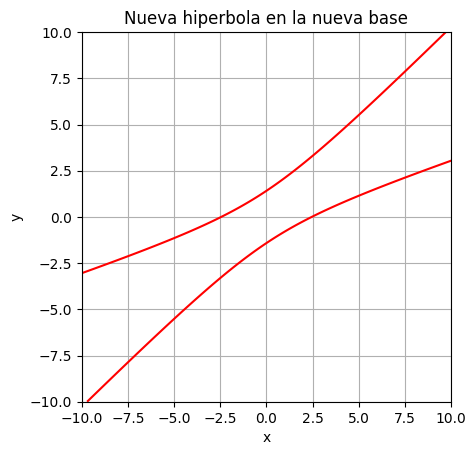

In [ ]:
# Diagonalizar A
D, Q = np.linalg.eig(A)

# Coordenadas originales (x, y)
x = np.linspace(-10, 10, 400)
y = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(x, y)

# Aplicar transformación Q^T v
v = np.vstack([X.ravel(), Y.ravel()])
u = np.dot(Q.T, v)

# Calcular la nueva hiperbola en las coordenadas (x', y')
d = 6
new_hyperbola = (D[0]*u[0]**2 + D[1]*u[1]**2) - d

# Graficar la nueva hiperbola
plt.contour(X, Y, new_hyperbola.reshape(X.shape), levels=[0], colors='r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Nueva hiperbola en la nueva base')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

### Sympy

In [ ]:
from sympy import Matrix, simplify

# Definir una matriz 3x3
A = Matrix([[4, 2, 0],
            [2, 4, 1],
            [0, 1, 3]])

# Calcular autovalores y autovectores
autovalores = A.eigenvals()
autovectores = A.eigenvects()

# Simplificar autovalores y autovectores
autovalores_simplificados = {simplify(l): m for l, m in autovalores.items()}
autovectores_simplificados = [(simplify(l), m, [simplify(v) for v in vs]) for l, m, vs in autovectores]

print("Autovalores simplificados:", autovalores_simplificados)
print("Autovectores simplificados:\n", autovectores_simplificados)


Autovalores simplificados: {11/3 + 16*2**(1/3)/(3*(61 + 3*sqrt(1407)*I)**(1/3)) + 2**(2/3)*(61 + 3*sqrt(1407)*I)**(1/3)/6: 1, (-128*2**(1/3) + (1 - sqrt(3)*I)*(44 + 2**(2/3)*(-1 + sqrt(3)*I)*(61 + 3*sqrt(1407)*I)**(1/3))*(61 + 3*sqrt(1407)*I)**(1/3))/(12*(1 - sqrt(3)*I)*(61 + 3*sqrt(1407)*I)**(1/3)): 1, (-128*2**(1/3) + (1 + sqrt(3)*I)*(44 - 2**(2/3)*(1 + sqrt(3)*I)*(61 + 3*sqrt(1407)*I)**(1/3))*(61 + 3*sqrt(1407)*I)**(1/3))/(12*(1 + sqrt(3)*I)*(61 + 3*sqrt(1407)*I)**(1/3)): 1}
Autovectores simplificados:
 [((-128*2**(1/3) + (1 + sqrt(3)*I)*(44 - 2**(2/3)*(1 + sqrt(3)*I)*(61 + 3*sqrt(1407)*I)**(1/3))*(61 + 3*sqrt(1407)*I)**(1/3))/(12*(1 + sqrt(3)*I)*(61 + 3*sqrt(1407)*I)**(1/3)), 1, [Matrix([
[(12*(-176 + 7*2**(2/3)*(1 + sqrt(3)*I)*(61 + 3*sqrt(1407)*I)**(1/3))*(1 + sqrt(3)*I)**2*(61 + 3*sqrt(1407)*I) + (61 + 3*sqrt(1407)*I)**(1/3)*(128*2**(1/3) + (-44 + 2**(2/3)*(1 + sqrt(3)*I)*(61 + 3*sqrt(1407)*I)**(1/3))*(1 + sqrt(3)*I)*(61 + 3*sqrt(1407)*I)**(1/3))**2 + 10752*2**(1/3)*(1 + sqrt(3)

In [ ]:
autovalores_simplificados

dict_keys([11/3 + 16*2**(1/3)/(3*(61 + 3*sqrt(1407)*I)**(1/3)) + 2**(2/3)*(61 + 3*sqrt(1407)*I)**(1/3)/6, (-128*2**(1/3) + (1 - sqrt(3)*I)*(44 + 2**(2/3)*(-1 + sqrt(3)*I)*(61 + 3*sqrt(1407)*I)**(1/3))*(61 + 3*sqrt(1407)*I)**(1/3))/(12*(1 - sqrt(3)*I)*(61 + 3*sqrt(1407)*I)**(1/3)), (-128*2**(1/3) + (1 + sqrt(3)*I)*(44 - 2**(2/3)*(1 + sqrt(3)*I)*(61 + 3*sqrt(1407)*I)**(1/3))*(61 + 3*sqrt(1407)*I)**(1/3))/(12*(1 + sqrt(3)*I)*(61 + 3*sqrt(1407)*I)**(1/3))])

# Pytorch

Definción de una matrix de tres formas:
Hasta ahora sabemos definir matrices como objetos de numpy y objetos de sympy, en la actualidad, el rápido crecimiento de las unidades de procesamiento gráfico GPU,  permite definir otro tipo de objetos que pueden acelerar el computo computacional.


- Como objeto de numpy
- Como objeto de sympy
- Como objeto de pytorch


La velocidad de ejecución entre PyTorch y Numpy puede variar dependiendo del tamaño de los datos y si se está utilizando o no la aceleración por GPU. Para operaciones con matrices pequeñas y cálculos que no requieren de la paralelización de una GPU, Numpy puede ser más rápido porque opera directamente en la CPU y la memoria principal. Sin embargo, para matrices grandes y operaciones que pueden ser paralelizadas, PyTorch con soporte de GPU puede ser significativamente más rápido.

Comparativa de comandos de ejecución entre pytorch, numpy  y sympy


| Operación | PyTorch | Numpy | SymPy |
|-----------|---------|-------|-------|
| Creación de una matriz | `torch.tensor([[1, 2], [3, 4]])` | `np.array([[1, 2], [3, 4]])` | `Matrix([[1, 2], [3, 4]])` |
| Transposición de una matriz | `torch.transpose(A, 0, 1)` | `A.T` o `np.transpose(A)` | `A.T` |
| Multiplicación de matrices | `torch.matmul(A, B)` | `np.dot(A, B)` o `A @ B` | `A * B` |
| Inversa de una matriz | `torch.inverse(A)` | `np.linalg.inv(A)` | `A**-1` |
| Determinante de una matriz | `torch.det(A)` | `np.linalg.det(A)` | `A.det()` |
| Autovalores y autovectores | `torch.eig(A, eigenvectors=True)` | `np.linalg.eig(A)` | `A.eigenvals()`, `A.eigenvects()` |


Ejemplo básico del comparativo de un problema de algebra lineal, rotación de un vector:

In [ ]:

def matrixA(theta, tipo="numpy"):
  if(tipo=="np"):
    return np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta), np.cos(theta)]])
  elif(tipo=="sp"):
    return np.array([[sp.cos(theta),-sp.sin(theta)],[sp.sin(theta), sp.cos(theta)]])

  elif(tipo=="pt"):
    return pt.tensor([[np.cos(theta),-np.sin(theta)],[np.sin(theta), np.cos(theta)]])

  else:

    print("Define el tipo de variable que desea")


In [ ]:
x = sp.Symbol("x")
M = sp.Matrix(matrixA(np.pi/4, tipo="sp"))
M

Matrix([
[0.707106781186548, -0.707106781186547],
[0.707106781186547,  0.707106781186548]])

In [ ]:
x=np.pi/4
M = matrixA(x, tipo="np")
M

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [ ]:
matrixA(x, tipo="pt")
M

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

Actividad:
*   Resolver el problema de la potencia de una matriz empleando pytorch, construir.
*   Resolver la exponencial de una  matriz ($e^A$)


In [ ]:
A = pt.tensor([[4, 2, 0],
              [2, 4, 1],
              [0, 1, 3]])

n = 2
A_n = pt.matrix_power(A, n)
print("Matriz A elevada a la potencia", n, ":\n", A_n)

Matriz A elevada a la potencia 2 :
 tensor([[20, 16,  2],
        [16, 21,  7],
        [ 2,  7, 10]])


| Operación |
|-----------|
| torch.eig(A, eigenvectors=True) |

esta obsoleta, me recomienda en cambio ultizar

```
torch.linalg.eig(A)
```



In [ ]:
A = pt.tensor([[4, 2, 0],
              [2, 4, 1],
              [0, 1, 3]], dtype=float)
# Lo contierto a este tipo de dato, para luego poder comparar con la otra matriz
A = A.to(dtype=pt.complex128)
valores_propios, vectores_propios = pt.linalg.eig(A)
print(valores_propios,vectores_propios, sep="\n")

tensor([6.1642+0.j, 1.6086+0.j, 3.2271+0.j], dtype=torch.complex128)
tensor([[ 0.6611-0.j, -0.5618+0.j, -0.4973+0.j],
        [ 0.7154+0.j,  0.6718+0.j,  0.1922+0.j],
        [ 0.2261-0.j, -0.4828+0.j,  0.8460+0.j]], dtype=torch.complex128)


**Nota:** Lo que quiero decir es que si dejo el tensor con `dtype = float` luego si escrbo `A = A_`. Para algunos datos retorna True y para otros False incluso cuando a efectos matematicos son iguales en realidad. La solucion que encontre fue convertir la matriz A al mismo dtype que ` torch.matmul` retorna, es decir, `dtype = complex128`. En la documentancion de pytorch tambien tienen notas al respecto


In [ ]:
def Diagonalizable(P,D):
  A_ = pt.matmul(P,pt.matmul(D, pt.inverse(P)))
  umbral = 1e-15
  A_[pt.abs(A_) < umbral] = 0
  if pt.allclose(A,A_) == True:
    print("La Matrix es diagonalizable")
    return True
  else:
    print("No es diagonalizable")
    return False

In [ ]:
def Matriz_potencia(A):
  valores_propios, vectores_propios = pt.linalg.eig(A)
  D = pt.diag(valores_propios)
  P = vectores_propios
  valor_bool = Diagonalizable(P,D)
  if valor_bool == True:
    lista_valores = ([])
    for i in valores_propios:
      e_elevado = np.exp(i) # e^autovalor
      lista_valores = np.append(lista_valores,e_elevado)
    lista_valores_ = pt.tensor(lista_valores)
    E = pt.diag(lista_valores_) # e^D
    matrix_elevada = pt.matmul(P, pt.matmul(E, pt.inverse(P))) # Definicion de e^A
    return print("e^A =", matrix_elevada)

In [ ]:
Matriz_potencia(A)

La Matrix es diagonalizable
e^A = tensor([[215.6140+0.j, 220.5750+0.j,  61.8156+0.j],
        [220.5750+0.j, 246.5218+0.j,  79.3797+0.j],
        [ 61.8156+0.j,  79.3797+0.j,  43.5109+0.j]], dtype=torch.complex128)
